In [152]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Import the dataset
dataset = pd.read_csv('heartdiseases.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 13].values
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,6.0,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3.0,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7.0,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3.0,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.0,1,3,124.0,255.0,1,0,175.0,0,0.0,1,2.0,3.0,0
299,57.0,1,4,132.0,207.0,0,0,168.0,1,0.0,1,0.0,7.0,0
300,49.0,1,3,118.0,149.0,0,2,126.0,0,0.8,1,3.0,3.0,1
301,74.0,0,2,120.0,269.0,0,2,121.0,1,0.2,1,1.0,3.0,0



# Data Preprocessing

In [153]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        298 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 33.3 KB


In [154]:
dataset.isnull().sum() # evaluating whether any value is missing in dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
num         0
dtype: int64

# Handling missing data and Splitting the data

In [155]:
# Handling missing data
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 11:13])
X[:, 11:13] = imputer.transform(X[:, 11:13])

# Splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Logistic Regression with hyperparameter tuning using grid search

In [156]:
# Define the hyperparameters to tune
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression object
classifier = LogisticRegression(random_state=0, solver='liblinear')

# Create a grid search object
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Predict the test set results using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Accuracy
logreg_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of LR :",metrics.accuracy_score(y_test, y_pred))
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Model Specificity: true negative rate
specificity = tn/(tn + fp)
print('Specificity of LR : ', specificity)
# Model Sensitivity: true positive rate
sensitivity = tp/(tp + fn)
print('Sensitivity of LR : ', sensitivity)

Best parameters:  {'C': 0.01, 'penalty': 'l2'}
Best score:  0.8460869565217392
Accuracy of LR : 0.868421052631579
Specificity of LR :  0.9473684210526315
Sensitivity of LR :  0.7894736842105263


# Random Forest Classifier with hyperparameter tuning using grid search

In [158]:
#EXPLORING THE DATASET
dataset.num.value_counts()

# Fitting Random Forest Classifier to the Training set with hyperparameter tuning using grid search
# Define the hyperparameters to tune
param_grid = {'n_estimators': [10, 50, 100, 200, 300], 'max_depth': [3, 5, 7, 9, 11], 'max_features': ['sqrt', 'log2', None]}

# Create a Random Forest Classifier object
classifier = RandomForestClassifier(random_state=0)

# Create a grid search object
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Predicting the Test set results using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Accuracy Score
RF_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of RF :",metrics.accuracy_score(y_test, y_pred))
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Model Specificity: true negative rate
specificity = tn/(tn + fp)
print('Specificity of RF : ', specificity)
# Model Sensitivity: true positive rate
sensitivity = tp/(tp + fn)
print('Sensitivity of RF : ', sensitivity)

Best parameters:  {'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 100}
Best score:  0.8283091787439615
Accuracy of RF : 0.868421052631579
Specificity of RF :  0.9736842105263158
Sensitivity of RF :  0.7631578947368421


# Decision tree Classifier with hyperparameter tuning using grid search

In [159]:
# Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier(random_state=8)

# Hyperparameter Tuning
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 11)}
grid_search = GridSearchCV(estimator=classifier, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Fitting Decision Tree Classification with the best hyperparameters
classifier = DecisionTreeClassifier(random_state=8, **best_params)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy
DT_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of DT :",metrics.accuracy_score(y_test, y_pred))
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Model Specificity: true negative rate
specificity = tn/(tn + fp)
print('Specificity of DT : ', specificity)
# Model Sensitivity: true positive rate
sensitivity = tp/(tp + fn)
print('Sensitivity of DT : ', sensitivity)

Accuracy of DT : 0.7763157894736842
Specificity of DT :  0.9736842105263158
Sensitivity of DT :  0.5789473684210527


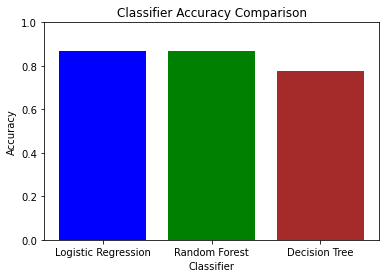

In [160]:
# Bar graph to compare the accuracy of the three classifiers
labels = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracy_scores = [logreg_acc, RF_acc, DT_acc]

plt.bar(labels, accuracy_scores, color=['blue', 'green', 'brown'])
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()
